#Visualizing Dummy Data

Dummy data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([3,6,13,28,55])

#Linear regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred_linear = linear_model.predict(x)

Polynomial regression(degree 2)

In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly,y)
y_pred_poly = poly_model.predict(x_poly)

Plot

ValueError: x and y must have same first dimension, but have shapes (6699, 1) and (5,)

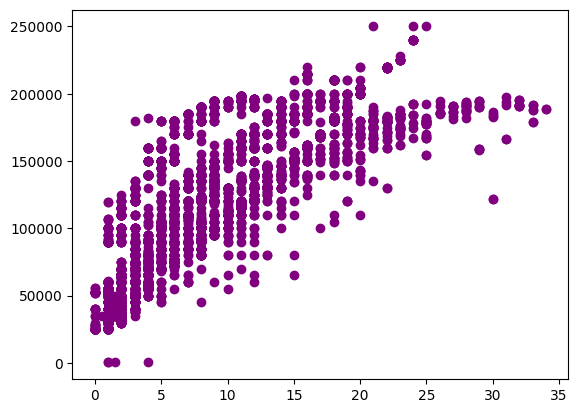

In [ ]:
plt.scatter(x,y,color='purple',label='Actual')
plt.plot(x, y_pred_linear,label='Linear Fit',color='blue')
plt.plot(x,y_pred_poly,label='Polynomial Fit (deg=2)',color='green')
plt.title("Linear vs Polynomial Fit (Dummy data)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Real Dataset:Salary prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Load dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()


,0
Years of Experience,0
Salary,0


Train-test split

In [ ]:
x = df[["Years of Experience"]]
y = df["Salary"]

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)

Linear regression

Train linear regression

In [ ]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)
y_pred_lin = lin_model.predict(x_test)

Metrics

In [ ]:
mse_lin = mean_squared_error(y_test,y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test,y_pred_lin)


print("Linear regression:")
print("MSE:",mse_lin)
print("RMSE:",rmse_lin)
print("R2 Score:",r2_lin)

Linear regression:
MSE: 946833177.7094355
RMSE: 30770.654489455297
R2 Score: 0.6669549610495003


Polynomial regression (Degree 2 and 4)

Degree 2

In [ ]:
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)


poly2_model = LinearRegression()
poly2_model.fit(x_train_poly2,y_train)
y_pred_poly2 = poly2_model.predict(x_test_poly2)

In [ ]:
x_train_poly2

array([[  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       ...,
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   2.,   4.]])

In [ ]:
x_test_poly2

array([[ 1.,  2.,  4.],
       [ 1.,  8., 64.],
       [ 1.,  3.,  9.],
       ...,
       [ 1.,  1.,  1.],
       [ 1.,  3.,  9.],
       [ 1.,  0.,  0.]])

Metrics

In [ ]:
mse_poly2 = mean_squared_error(y_test,y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2 = r2_score(y_test,y_pred_poly2)

Degree 4

In [ ]:
poly4 = PolynomialFeatures(degree=4)
x_train_poly4 = poly4.fit_transform(x_train)
x_test_poly4 = poly4.transform(x_test)


poly4_model = LinearRegression()
poly4_model.fit(x_train_poly4,y_train)
y_pred_poly4 = poly4_model.predict(x_test_poly4)

In [ ]:
x_train_poly4

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       ...,
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [ ]:
x_test_poly4

array([[1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       ...,
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

Metrics

In [ ]:
mse_poly4 = mean_squared_error(y_test,y_pred_poly4)
rmse_poly4 = np.sqrt(mse_poly4)
r2_poly4 = r2_score(y_test,y_pred_poly4)



print("\nPolynomial regression (Degree2)")
print("MSE:",mse_poly2)
print("RMSE:",rmse_poly2)
print("R2 Score:",r2_poly2)

print("\nPolynomial regression (Degree4)")
print("MSE:",mse_poly4)
print("RMSE:",rmse_poly4)
print("R2 Score:",r2_poly4)








Polynomial regression (Degree2)
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 Score: 0.7443306732971963

Polynomial regression (Degree4)
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 Score: 0.7467308484568018


#**Visualization of All Methods**

Generate smooth line for predictions

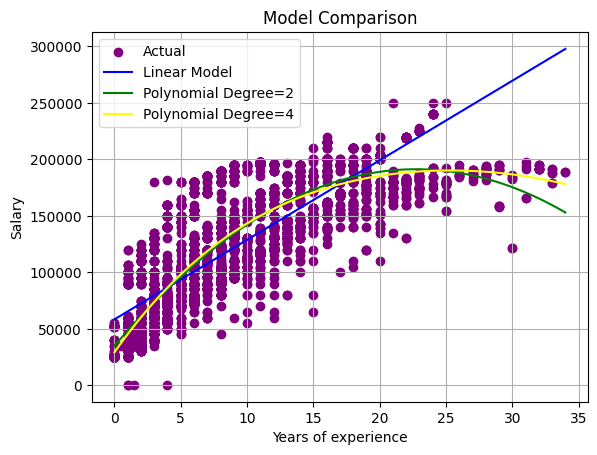

In [ ]:
x_range = np.linspace(x.min(),x.max(),100).reshape(-1,1)


#Create dataframe with column name
x_range_df = pd.DataFrame(x_range,columns=["Years of Experience"])

#transform using polynomial features
x_range_poly2 = poly2.transform(x_range_df)
x_range_poly4 = poly4.transform(x_range_df)

#Predict using models
y_range_lin = lin_model.predict(x_range_df)
y_range_poly2 = poly2_model.predict(x_range_poly2)
y_range_poly4 = poly4_model.predict(x_range_poly4)

#plot
plt.scatter(x,y,color='purple',label='Actual')
plt.plot(x_range, y_range_lin,label='Linear Model',color='blue')
plt.plot(x_range,y_range_poly2,label='Polynomial Degree=2',color='green')

plt.plot(x_range,y_range_poly4,label='Polynomial Degree=4',color='yellow')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Model Comparison")
plt.legend()
plt.grid(True)
plt.show()


Model Performance Comparison

In [ ]:
metrics_df = pd.DataFrame({
    "Model" : ["Linear Regression","Polynomial (Degree 2)","Polynomial (Degree 4)"],
    "MSE" : [mse_lin,mse_poly2,mse_poly4],
    "RMSE" : [rmse_lin,rmse_poly2,rmse_poly4],
    "R2 Score" : [r2_lin,r2_poly2,r2_poly4]
})

metrics_df.style.format({
    "MSE": "{:.2f}",
    "RMSE": "{:.2f}",
    "R2 Score": "{:.4f}"
})

,Model,MSE,RMSE,R2 Score
0,Linear Regression,946833177.71,30770.65,0.6670
1,Polynomial (Degree 2),726857249.72,26960.29,0.7443
2,Polynomial (Degree 4),720033651.69,26833.44,0.7467
